<a href="https://colab.research.google.com/github/domiTEN/03miar-algoritmos-optimizacion/blob/main/actividad-guiada-2/Domingo_Jimenez_Liebana_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: Domingo Jiménez Liébana <br>
Link:   https://colab.research.google.com/drive/1CiNhrsxGP_7LKaAqWapADCnFp-4v7yTX?usp=sharing <br>
Github: https://github.com/xxxxx/AlgoritmosOptimizacion
<br>




In [20]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

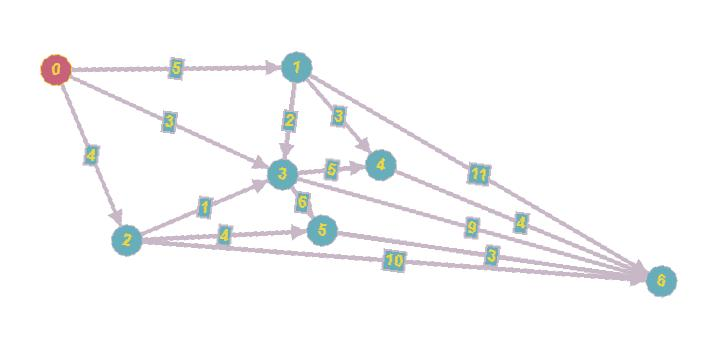

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [21]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [22]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [23]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [24]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

##Problema de Asignacion de tarea

In [25]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [26]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    #print(S[i], COSTES[S[i]][i])
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [27]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [28]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [29]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [30]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


## Comprobación de viabilidad de tamaño del problema
La idea ahora es comprobar hasta que número de tareas (y agentes) es viable el problema.

Para ello, voy a crear una función *random_tasks_matrix* que se encarga de generar la matriz cuadrada de tareas y agentes con el tamaño que se le indique por parámetro.

Esta función la utilizaré para hacer un bucle en el que en cada iteración incrementaré en uno el número de tareas, realizaré la llamada a la función *ramificacion_y_poda* y mostraré el tiempo total para poder ver cómo incrementa.

Tras el código, añadiré una celda comentando los resultados.

In [31]:
def random_tasks_matrix(size: int):
  costes_random_list = np.random.randint(1, 99, size=(size, size))
  #display(costes_random_list)
  return costes_random_list

# ejemplo de uso
random_tasks_matrix(4)

array([[29, 90, 81, 55],
       [31, 41, 69,  1],
       [63, 49, 88, 75],
       [16,  7, 79, 87]])

In [36]:
max_tasks = 15
for num_tasks in range(2,max_tasks):
  print(f"********** Número de tareas (y agentes): {num_tasks} **********")
  %time ramificacion_y_poda(random_tasks_matrix(num_tasks))
  print(f"********************")

********** Número de tareas (y agentes): 2 **********
La solucion final es: (0, 1)  en  1  iteraciones  para dimension:  2
CPU times: user 415 µs, sys: 1 µs, total: 416 µs
Wall time: 411 µs
********************
********** Número de tareas (y agentes): 3 **********
La solucion final es: [{'s': (2, 1, 0), 'ci': np.int64(105)}]  en  5  iteraciones  para dimension:  3
CPU times: user 207 µs, sys: 0 ns, total: 207 µs
Wall time: 199 µs
********************
********** Número de tareas (y agentes): 4 **********
La solucion final es: [{'s': (0, 3, 1, 2), 'ci': np.int64(32)}]  en  18  iteraciones  para dimension:  4
CPU times: user 341 µs, sys: 1 µs, total: 342 µs
Wall time: 332 µs
********************
********** Número de tareas (y agentes): 5 **********
La solucion final es: [{'s': (0, 1, 4, 2, 3), 'ci': np.int64(146)}]  en  75  iteraciones  para dimension:  5
CPU times: user 1.36 ms, sys: 0 ns, total: 1.36 ms
Wall time: 1.35 ms
********************
********** Número de tareas (y agentes): 6 *

KeyboardInterrupt: 

********************
********** Número de tareas (y agentes): 14 **********


KeyboardInterrupt: 

********************


### Interpretación de los resultados

A partir de 10 agentes, el tiempo de ejecución para resolver el problema, se dispara. Tras lanzar varias veces el algoritmo, he podido comprobar que con menos de 10 tareas, suele ser bastante rápido, pero que en algunos casos, tarda unos segundos. Esto tiene sentido ya que depende de cómo vengan los datos, se podrá "podar" más y, por tanto, reducir el número de iteraciones.

Un ejemplo de esta "aleatoriedad" en cuanto a la poda, es que una ejecución con 14 tareas (se puede ver en la celda justo abajo de esta) me ha tardado 4min y 58s y si miramos en la celda de más arriba, una ejecución para 10 tareas ha tardado 17min y 5s.

En el ejemplo de más arriba, he lanzado hasta 15 tareas (aunque lo paré cuando estaba ejecutándose con 13 agentes porque llevaba 1h y 35min) y los tiempos son los siguientes:

| Dimensión | Iteraciones | Tiempo |
|-----------|-------------|--------|
|     2      |      1       |    416 µs    |
|     3      |      5       |    207 µs    |
|     4      |      18       |   342 µs    |
|     5      |      75       |   1.36 ms     |
|     6      |      248       |  8.06 ms      |
|     7      |      156       |  6.09 ms      |
|     8      |      50       |   4.51 ms     |
|     9      |      396       |  43 ms      |
|    10      |      67.021     |  16min 12s        |
|    11      |      50.256     |   9min 39s     |
|    12      |      41.800     |   6min 28s       |
|    13      |             |   Abortado porque llevaba demasiado tiempo     |


Como podemos ver, según aumenta el tamaño del problema, tiene a crecer el tiempo de ejecución, pero no siempre es así porque gracias a la poda, en algunos casos con más dimensión se realizan menos iteraciones que en otros casos con menos dimensión.

In [35]:
%time ramificacion_y_poda(random_tasks_matrix(14))


La solucion final es: [{'s': (2, 10, 12, 7, 11, 3, 1, 5, 4, 6, 9, 0, 13, 8), 'ci': np.int64(140)}]  en  37071  iteraciones  para dimension:  14
CPU times: user 4min 47s, sys: 267 ms, total: 4min 47s
Wall time: 4min 58s


In [ ]:
%time ramificacion_y_poda(costes_random(10))

array([[64, 95, 48, 60, 48, 29, 33, 80, 90, 47],
       [37, 58, 27,  7, 82,  2, 11, 19, 74, 56],
       [77, 62, 36, 76,  2, 63, 62, 75, 42, 20],
       [21, 26, 10, 80, 86, 36, 82, 30, 10, 74],
       [33, 55, 56, 94, 39, 70,  4, 58, 73, 71],
       [38, 54, 63, 28, 94, 25, 68, 51, 23,  4],
       [90, 29, 75, 24, 29, 53, 72, 24, 53, 43],
       [89,  3,  7, 29, 97, 37, 81, 37, 32, 56],
       [71, 74, 28, 70, 46, 24, 66, 58, 58, 61],
       [15, 41, 26, 34, 11, 81, 90, 29, 33, 73]])

La solucion final es: [{'s': (5, 3, 4, 2, 6, 9, 7, 1, 8, 0), 'ci': np.int64(156)}]  en  5799  iteraciones  para dimension:  10
CPU times: user 3.77 s, sys: 4.01 ms, total: 3.77 s
Wall time: 3.79 s


##Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [41]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

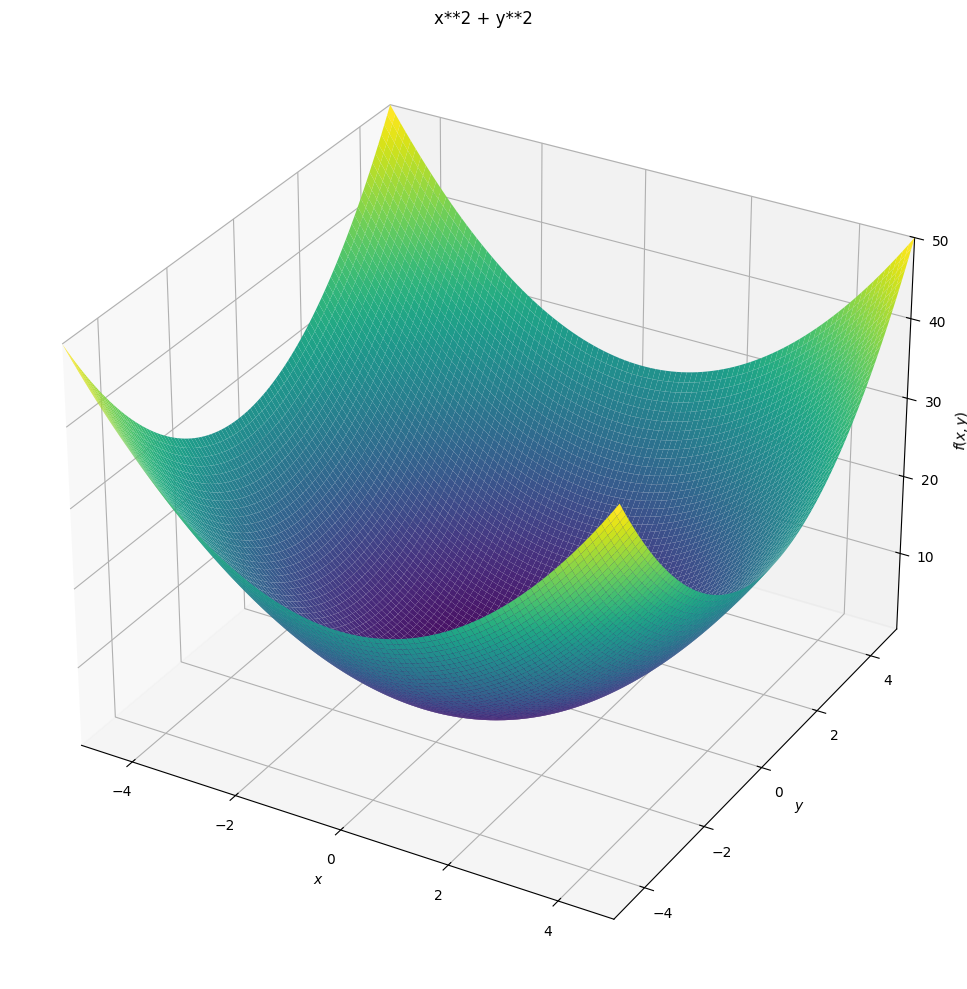

In [42]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

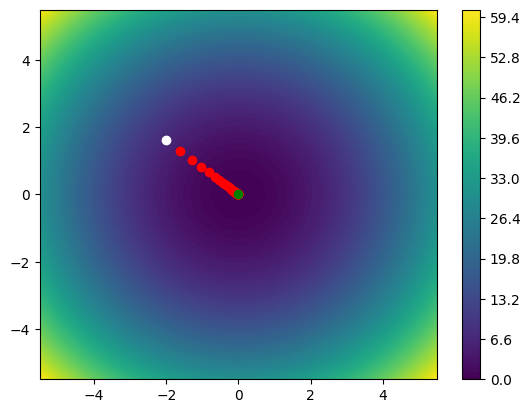

Solucion: [-2.8840720810757607e-05, 2.3034880094184203e-05] 1.3623928778375105e-09


In [43]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
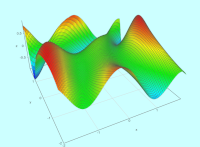


In [44]:
import sympy as sp
import math

from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d

In [46]:
x = sp.symbols('x')
y = sp.symbols('y')

# definimos la función con sympy para calcular la derivada más fácilmente
f = sp.sin( sp.Rational(1,2)*x**2 - sp.Rational(1,4)*y**2 + 3 ) * sp.cos( 2*x + 1 - sp.exp(y) )

# calculamos las derivadas con rexpecto a x y respecto a y (gradiente)
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

grad_f = sp.Matrix([df_dx, df_dy])

# mostramos el gradiente
print(grad_f)

Matrix([[x*cos(2*x - exp(y) + 1)*cos(x**2/2 - y**2/4 + 3) - 2*sin(2*x - exp(y) + 1)*sin(x**2/2 - y**2/4 + 3)], [-y*cos(2*x - exp(y) + 1)*cos(x**2/2 - y**2/4 + 3)/2 + exp(y)*sin(2*x - exp(y) + 1)*sin(x**2/2 - y**2/4 + 3)]])


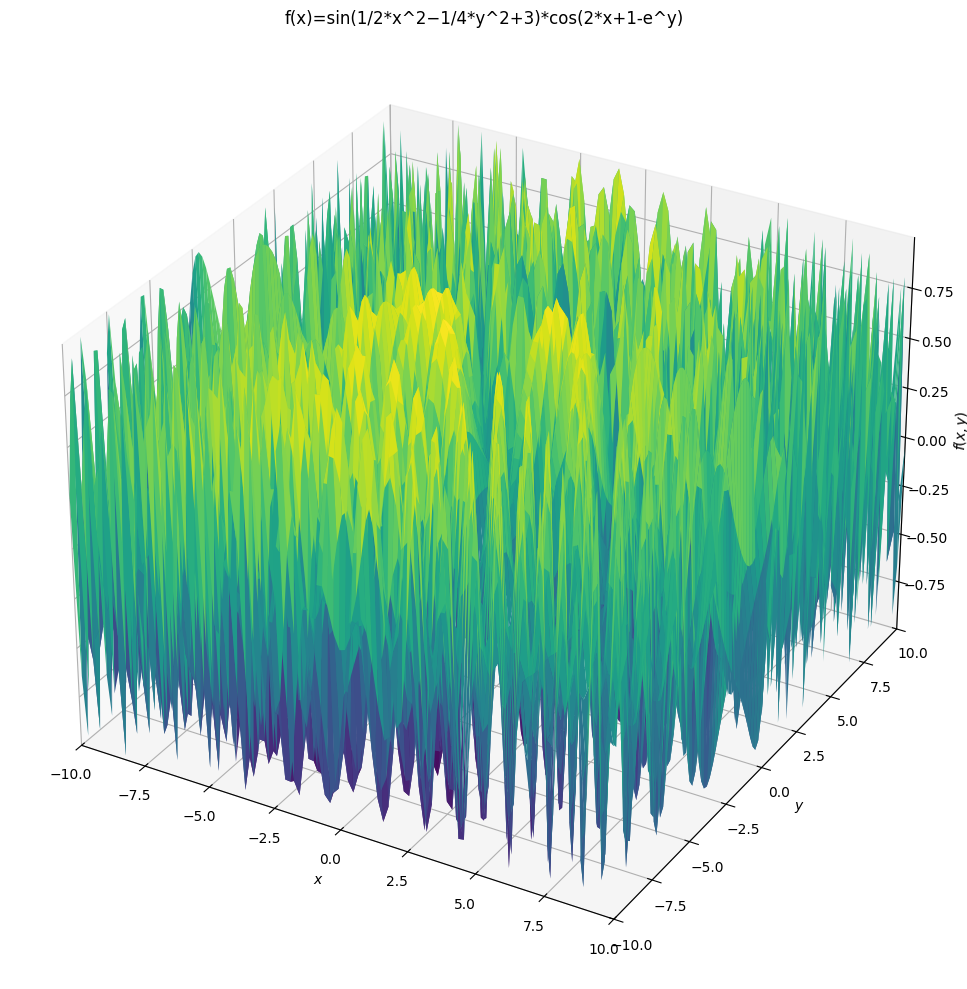

In [48]:
# mostramos la función
plot3d(f,
       (x,-10,10),(y,-10,10),
       title='f(x)=sin(1/2*x^2−1/4*y^2+3)*cos(2*x+1-e^y)',
       size=(10,10))